In [2]:
#import pydotplus
import time
import random
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen

In [3]:
data = pd.read_csv("bank.csv")
temp = data
temp2 = data.columns.values
temp2

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
data.shape

(11162, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Outlier Detection and Removal

<AxesSubplot:>

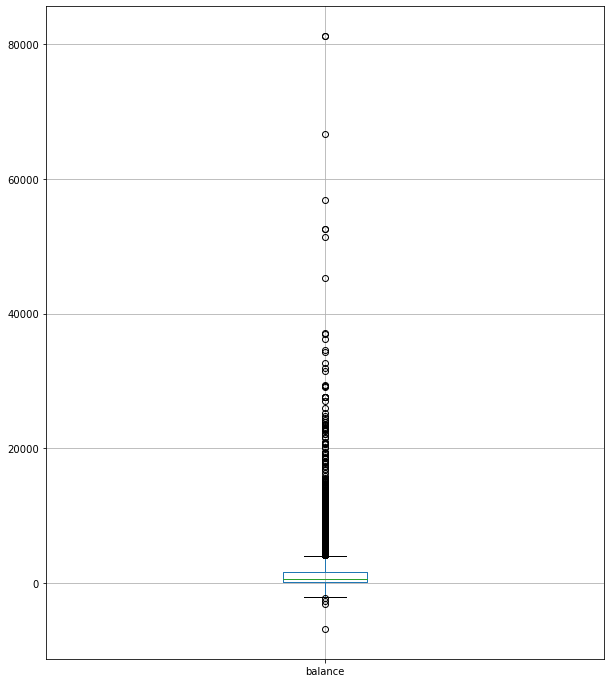

In [8]:
#Outlier detection for balance

data.boxplot(column='balance',figsize=(10,12))

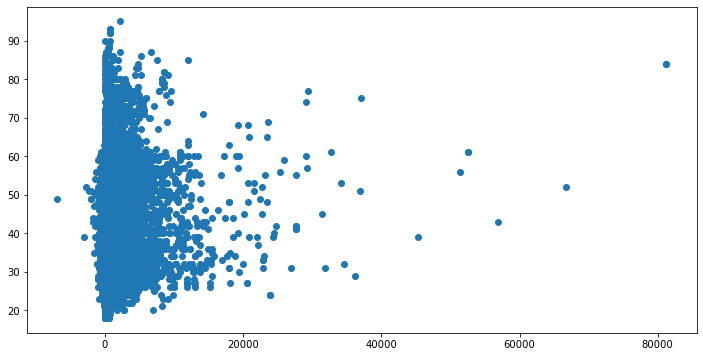

In [9]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(data['balance'], data['age'])

In [10]:
print(data['balance'].skew())
data['balance'].describe()

8.224619112755489


count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

In [11]:
index = data[(data['balance'] > 20000)|(data['balance'] < -1000)].index
data.drop(index, inplace=True)
data['balance'].describe()

count    11083.000000
mean      1385.766940
std       2256.435569
min       -994.000000
25%        123.000000
50%        545.000000
75%       1685.000000
max      19447.000000
Name: balance, dtype: float64

<AxesSubplot:>

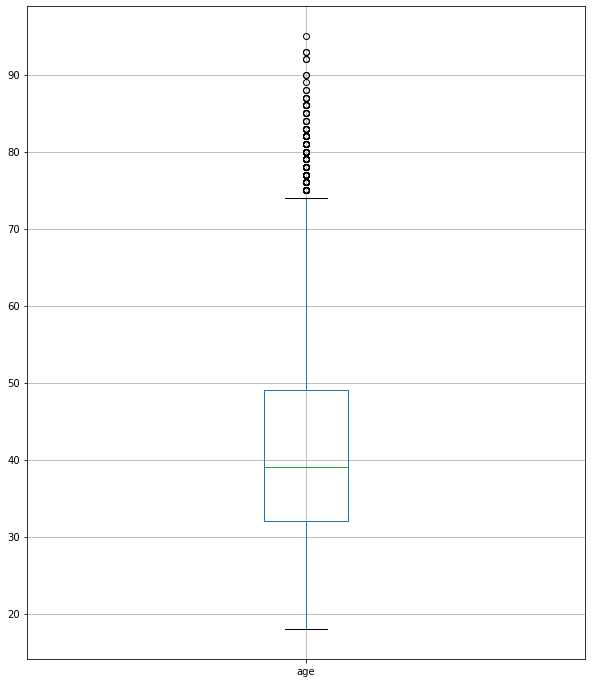

In [12]:
#Outlier detection for age

data.boxplot(column='age',figsize=(10,12))

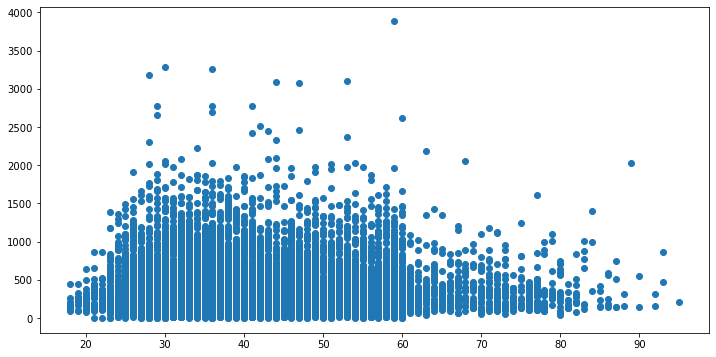

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(data['age'], data['duration'])

In [14]:
print(data['age'].skew())
data['age'].describe()

0.8637817090442628


count    11083.000000
mean        41.189209
std         11.891088
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

In [15]:
index = data[(data['age'] > 84)|(data['age'] < 18)].index
data.drop(index, inplace=True)
data['age'].describe()

count    11059.000000
mean        41.087531
std         11.700911
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         84.000000
Name: age, dtype: float64

<AxesSubplot:>

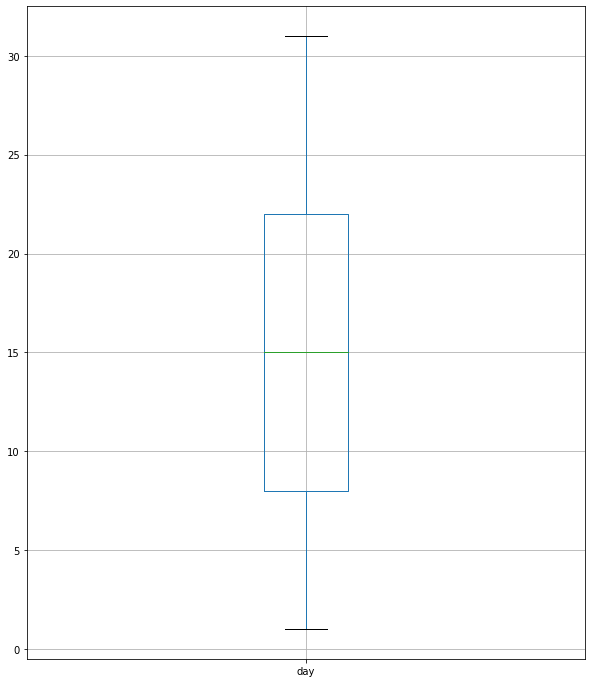

In [16]:
#Outlier detection for day

data.boxplot(column='day',figsize=(10,12)) #no outliers

<AxesSubplot:>

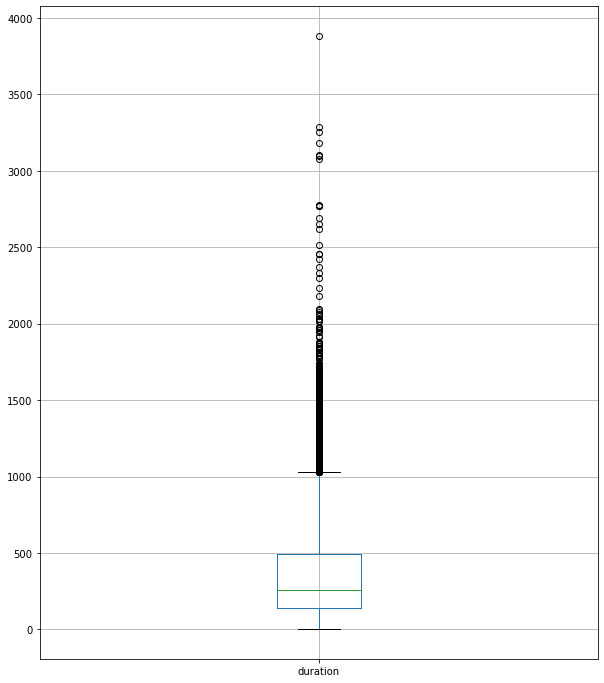

In [17]:
#Outlier detection for duration

data.boxplot(column='duration',figsize=(10,12))

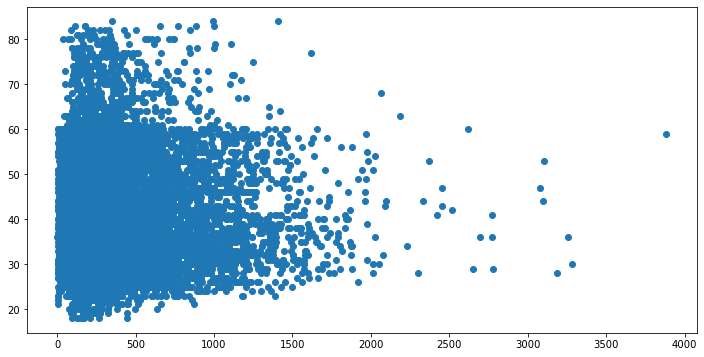

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(data['duration'], data['age'])

In [19]:
print(data['duration'].skew())
data['duration'].describe()

2.141539075909775


count    11059.000000
mean       372.011936
std        347.337007
min          2.000000
25%        138.000000
50%        255.000000
75%        495.500000
max       3881.000000
Name: duration, dtype: float64

In [20]:
index = data[(data['duration'] > 1550)|(data['duration'] < 2)].index
data.drop(index, inplace=True)
data['duration'].describe()

count    10934.000000
mean       354.237516
std        303.057170
min          2.000000
25%        137.000000
50%        252.000000
75%        481.000000
max       1550.000000
Name: duration, dtype: float64

<AxesSubplot:>

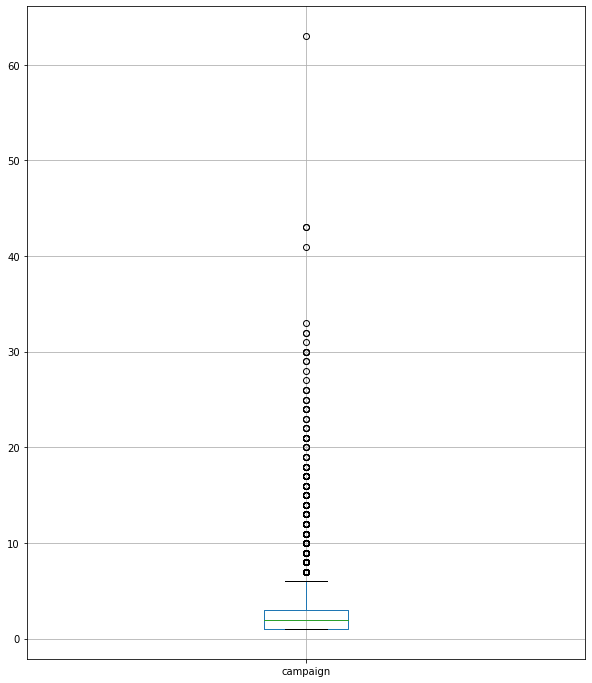

In [21]:
#Outlier detection for campaign

data.boxplot(column='campaign',figsize=(10,12))

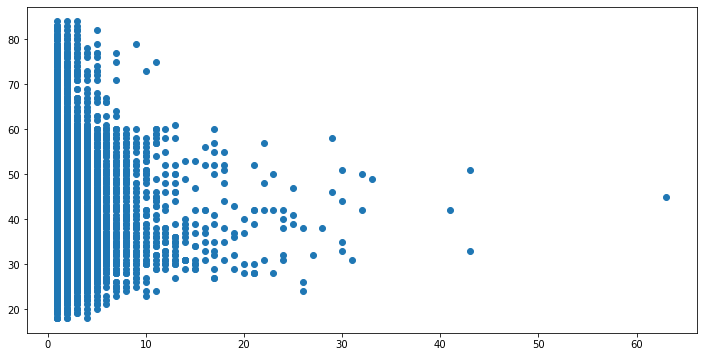

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(data['campaign'], data['age'])

In [23]:
print(data['campaign'].skew())
data['campaign'].describe()

5.579363984999422


count    10934.000000
mean         2.506128
std          2.726522
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [24]:
index = data[(data['campaign'] > 14)|(data['campaign'] < 1)].index
data.drop(index, inplace=True)
data['campaign'].describe()

count    10840.000000
mean         2.340775
std          1.956610
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: campaign, dtype: float64

<AxesSubplot:>

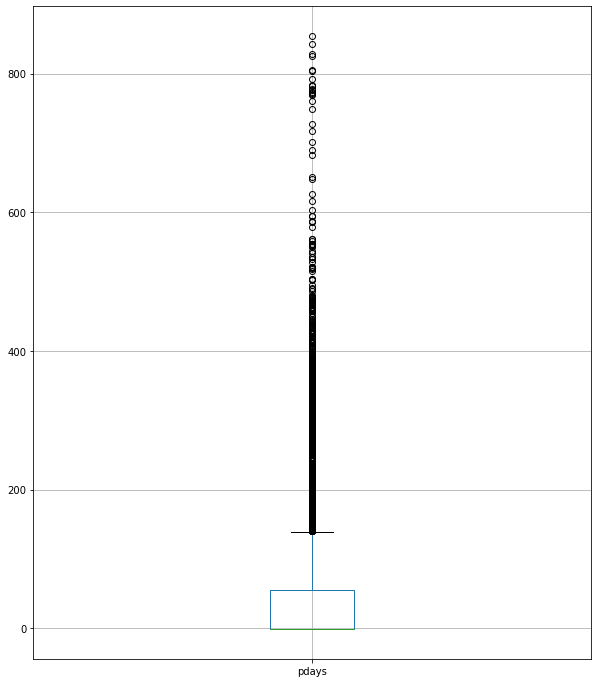

In [25]:
#Outlier detection for pdays

data.boxplot(column='pdays',figsize=(10,12))

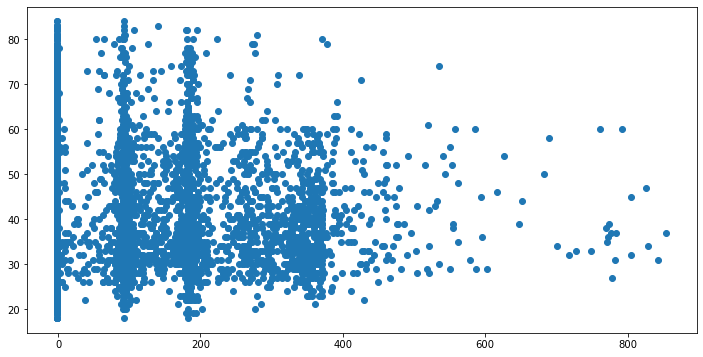

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(data['pdays'], data['age'])

In [27]:
print(data['pdays'].skew())
data['pdays'].describe()

2.427827477197185


count    10840.000000
mean        52.182103
std        109.537794
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         55.000000
max        854.000000
Name: pdays, dtype: float64

In [28]:
index = data[(data['pdays'] > 375)].index
data.drop(index, inplace=True)
data['pdays'].describe()

count    10663.000000
mean        44.892713
std         93.231526
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        375.000000
Name: pdays, dtype: float64

<AxesSubplot:>

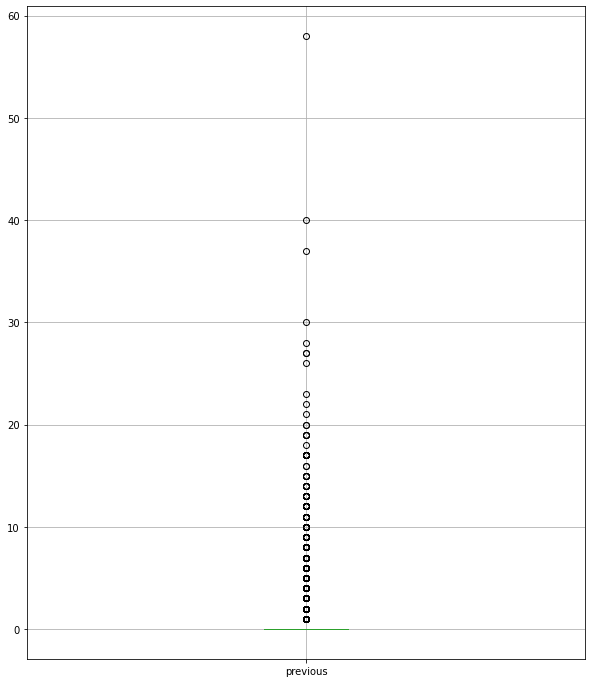

In [29]:
#Outlier detection for previous

data.boxplot(column='previous',figsize=(10,12))

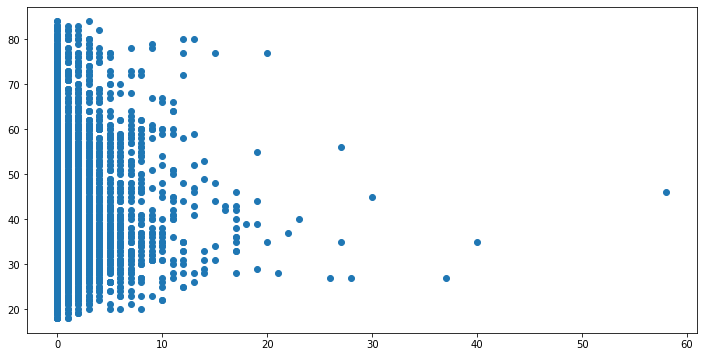

In [30]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(data['previous'], data['age'])

In [31]:
print(data['previous'].skew())
data['previous'].describe()

6.470571372598539


count    10663.000000
mean         0.807653
std          2.186324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: previous, dtype: float64

In [32]:
index = data[(data['previous'] > 11)|(data['previous'] < 0)].index
data.drop(index, inplace=True)
data['previous'].describe()

count    10596.000000
mean         0.703284
std          1.645539
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: previous, dtype: float64

### Checking and Removing missing values 

In [33]:
# Missing Data

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
age,0,0.0
day,0,0.0
poutcome,0,0.0
previous,0,0.0
pdays,0,0.0
campaign,0,0.0
duration,0,0.0
month,0,0.0
contact,0,0.0
job,0,0.0


In [35]:
# Checking and removing data if it contains missing values

data = data.drop((missing_data[missing_data['Percent'] > 0.4]).index,1)
print(data.isnull().sum().max())

0


### Encoding using LabelEncoder

In [36]:
# Encoding the categorical  data

contact_data = data

In [ ]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['day_of_week'] = le.fit_transform(res_df['day'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [38]:
encoded_data = preprocessor(contact_data)

In [39]:
encoded_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,day_of_week
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1,4
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1,4
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1,4
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1,4
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0,19
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0,15
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0,18
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0,7


### Zero Variance Check

In [37]:
# Zero Variance Check

norm = normalize(encoded_data)
data_scaled = pd.DataFrame(norm)
data_scaled.var()
variance=data_scaled.var()
a = []
b=[]
col = encoded_data.columns
for i in range(0,len(variance)):
    if variance[i]>0.00001:
        a.append(col[i])
    else:
        b.append(col[i])
        #encoded_data.drop(col[i], inplace=True, axis=1)
print('Columns with variance greater than 0',a)   

print('Columns with variance statistically equal to 0',b)  
encoded_data.drop('default', inplace=True, axis=1)
encoded_data.drop('housing', inplace=True, axis=1)
encoded_data.drop('loan', inplace=True, axis=1)
encoded_data.drop('previous', inplace=True, axis=1)

Columns with variance greater than 0 ['age', 'job', 'marital', 'education', 'balance', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'poutcome', 'day_of_week']
Columns with variance statistically equal to 0 ['default', 'housing', 'loan', 'previous', 'deposit']


### Corelation Check

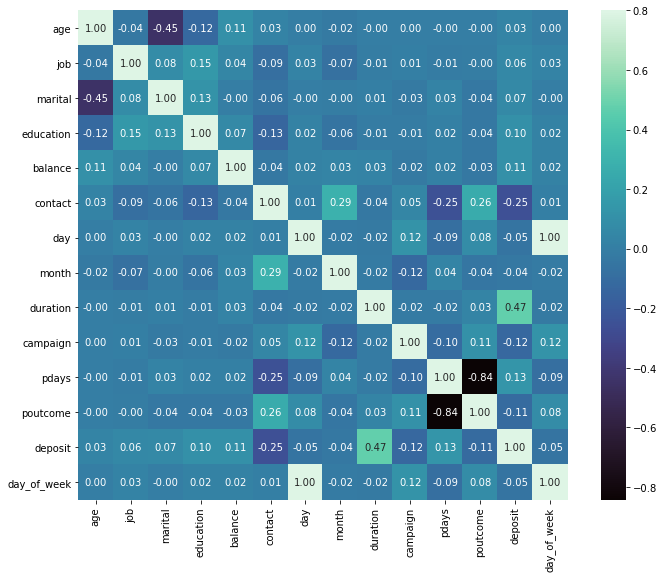

In [38]:
corrmat = encoded_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap="mako", annot=True, fmt='.2f');

In [39]:
# Corelation checking and removing columns whose corelation coefficient is >0.75

rows, cols = encoded_data.shape
flds = list(encoded_data.columns)
cor = encoded_data.corr().values

for i in range(cols):
    for j in range(i+1, cols):
        if cor[i,j] > 0.75:
            print (flds[i], ' ', flds[j], ' ', cor[i,j])
            
#encoded_data.drop('previous', inplace=True, axis=1)
encoded_data.drop('day_of_week', inplace=True, axis=1)

day   day_of_week   1.0


### Training and Testing data

In [40]:
feature_space = encoded_data.iloc[:, encoded_data.columns != 'deposit']
feature_class = encoded_data.iloc[:, encoded_data.columns == 'deposit']

training_set, test_set, class_set, test_class_set = train_test_split(feature_space,
                                                                    feature_class,
                                                                    test_size = 0.20, 
                                                                    random_state = 42)


In [41]:
# Cleaning test sets to avoid future warning messages

class_set = class_set.values.ravel() 
test_class_set = test_class_set.values.ravel() 

In [42]:
# Set the random state for reproducibility

fit_rf = RandomForestClassifier(random_state=42)

#### Grid Search CV

In [43]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [12, 13, 14],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 1)

cv_rf.fit(training_set, class_set)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 14, 'max_features': None}
Time taken in grid search:  2194.78


#### Decision Tree

In [44]:
# Decision tree with depth = 14

model_dt_14 = DecisionTreeClassifier(random_state=1, max_depth=14, criterion = "entropy", max_features=None, min_samples_split=50 )
model_dt_14.fit(training_set, class_set)
model_dt_14_score_train = model_dt_14.score(training_set, class_set)
print("Training score: ",model_dt_14_score_train)
model_dt_14_score_test = model_dt_14.score(test_set, test_class_set)
print("Testing score: ",model_dt_14_score_test)
y_pred_dt = model_dt_14.predict_proba(test_set)[:, 1]

Training score:  0.862081170363379
Testing score:  0.814622641509434


In [45]:
fpr_dt, tpr_dt, _ = roc_curve(test_class_set, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [46]:
predictions = model_dt_14.predict(test_set)
predictions

array([0, 0, 0, ..., 1, 0, 1])

In [47]:
# Here we calculate the recall!

y_actual_result = test_class_set[0]

for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, test_class_set[i]))

y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.7836034318398475


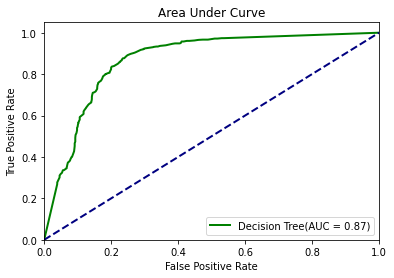

In [48]:
#AUC curve
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [49]:
#confusion matrix
print (confusion_matrix(test_class_set, predictions))

[[905 226]
 [167 822]]


In [50]:
# Here we calculate the accuracy!

accuracy_score(test_class_set, predictions)

0.814622641509434

In [51]:
''' Insights
The accuracy of the decision tree without removing outliers is statistically similar to the accuracy after removing outliers

This is because Decision tree algorithms are least affected by the outliers

The above decision tree has the problem of overfitting for max_depth=14, criterion = "entropy", max_features=None

The model correctly classify almost every example when min_samples_split was set to default ie 2 
as a result the training accuracy was 99% 

Hence to reduce the problem of overfitting the min_samples_split was set to 50 '''

' Insights\nThe accuracy of the decision tree without removing outliers is statistically similar to the accuracy after removing outliers\n\nThis is because Decision tree algorithms are least affected by the outliers\n\nThe above decision tree has the problem of overfitting for max_depth=14, criterion = "entropy", max_features=None\n\nThe model correctly classify almost every example when min_samples_split was set to default ie 2 \nas a result the training accuracy was 99% \n\nHence to reduce the problem ofoverfitting the min_samples_split was set to 50 '

#### Random Forest

In [52]:
fit_rf.set_params(criterion = 'entropy',
                  max_features = None, 
                  max_depth = 14)

RandomForestClassifier(criterion='entropy', max_depth=14, max_features=None,
                       random_state=42)

In [53]:
fit_rf.fit(training_set, class_set)

RandomForestClassifier(criterion='entropy', max_depth=14, max_features=None,
                       random_state=42)

In [54]:
predictions_rf = fit_rf.predict(test_set)

#### Feature Importance

In [55]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [56]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

names_index = feature_space.columns

In [57]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    #ax.set_axis_bgcolor('#fafafa')
    plt.title('Feature importances for Bank dataset\
    \nBanking Prediction')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 12)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease')
    plt.ylabel('Feature')

    plt.show()
    plt.close()


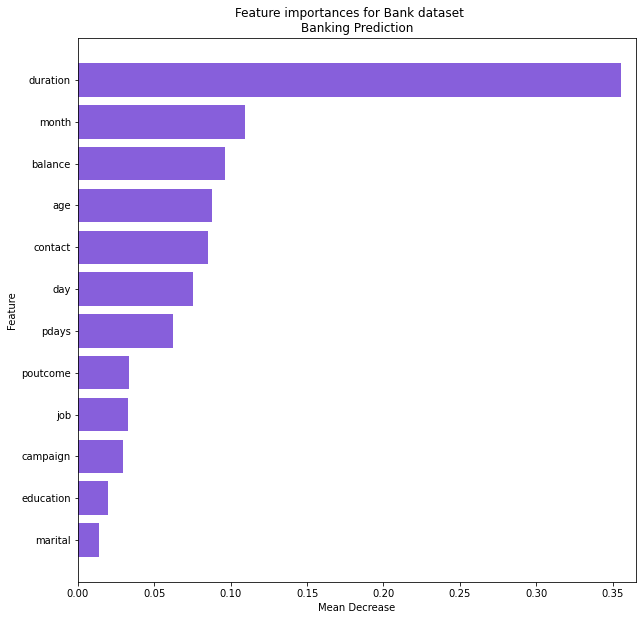

In [58]:
variable_importance_plot(importances_rf, indices_rf, names_index)

#### Confusion Matrix

In [59]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

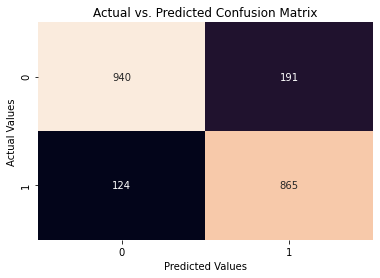

In [60]:
conf_mat = create_conf_mat(test_class_set, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

### Performance metrices

In [61]:
# Here we calculate the accuracy!

accuracy_rf = fit_rf.score(test_set, test_class_set)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.851


In [62]:
# Here we calculate the test error rate!

test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.1486


In [63]:
# Here we calculate the recall!

y_actual_result = test_class_set[0]

for i in range(len(predictions_rf)):
    if(predictions_rf[i] == 1):
        y_actual_result = np.vstack((y_actual_result, test_class_set[i]))

y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.8183538315988647


In [64]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = fit_rf.predict_proba(test_set)[:, 1]

fpr2, tpr2, _ = roc_curve(test_class_set,
                          predictions_prob,
                          pos_label = 1)

In [65]:
auc_rf = auc(fpr2, tpr2)

In [66]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

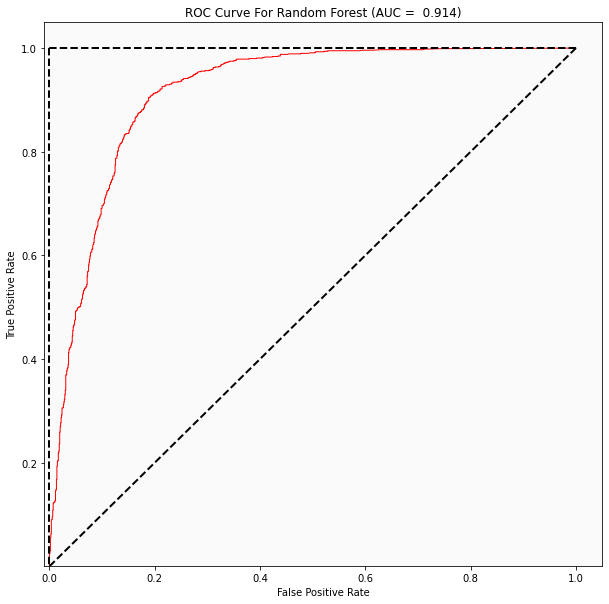

In [67]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))